In [143]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df1 = pd.read_csv('predictors.csv')
df2 = pd.read_csv('response.csv')

In [78]:
df1.head()

,store_id,date,state,local_population,local_stores
0,131,2021-11-19,New York,7438,2
1,203,2021-04-09,New York,59715,1
2,50,2021-08-19,New York,29231,2
3,585,2021-01-18,Pennsylvania,4884,2
4,138,2021-03-25,New York,12350,1


In [79]:
df2.head()

,store_id,units_sold
0,981,4.0
1,664,17.0
2,84,21.0
3,659,18.0
4,288,3.0


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   store_id          1000 non-null   int64 
 1   date              1000 non-null   object
 2   state             1000 non-null   object
 3   local_population  1000 non-null   int64 
 4   local_stores      1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store_id    1000 non-null   int64  
 1   units_sold  999 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [82]:
df = pd.merge(df1, df2, on='store_id', how='inner')

In [83]:
df.head()

,store_id,date,state,local_population,local_stores,units_sold
0,131,2021-11-19,New York,7438,2,1.0
1,203,2021-04-09,New York,59715,1,14.0
2,50,2021-08-19,New York,29231,2,9.0
3,585,2021-01-18,Pennsylvania,4884,2,0.0
4,138,2021-03-25,New York,12350,1,2.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          1000 non-null   int64  
 1   date              1000 non-null   object 
 2   state             1000 non-null   object 
 3   local_population  1000 non-null   int64  
 4   local_stores      1000 non-null   int64  
 5   units_sold        999 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.7+ KB


In [85]:
df.isnull().sum()

store_id            0
date                0
state               0
local_population    0
local_stores        0
units_sold          1
dtype: int64

In [86]:
df[df['units_sold'].isna()]

,store_id,date,state,local_population,local_stores,units_sold
553,644,2021-07-12,Pennsylvania,19502,2,NaN


In [87]:
duplicate_rows = df[df.duplicated(subset=['store_id'], keep=False)]
duplicate_rows

,store_id,date,state,local_population,local_stores,units_sold
552,644,2021-07-12,Pennsylvania,19502,2,2.0
553,644,2021-07-12,Pennsylvania,19502,2,NaN


In [88]:
df = df.dropna()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          999 non-null    int64  
 1   date              999 non-null    object 
 2   state             999 non-null    object 
 3   local_population  999 non-null    int64  
 4   local_stores      999 non-null    int64  
 5   units_sold        999 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.6+ KB


In [90]:
df.describe()

,store_id,local_population,local_stores,units_sold
count,999.000000,999.000000,999.000000,999.000000
mean,499.234234,34792.015015,1.608609,6.403403
std,288.841736,46006.693577,0.780503,11.419950
min,0.000000,870.000000,1.000000,0.000000
25%,249.500000,11093.500000,1.000000,1.000000
50%,499.000000,21099.000000,1.000000,3.000000
75%,748.500000,43020.000000,2.000000,7.000000
max,999.000000,783541.000000,8.000000,190.000000


In [91]:
df['date'] = pd.to_datetime(df['date'])

In [95]:
for column in df.columns:
    fig = px.box(df, y=column)
    fig.update_layout(
        title=f"Box Plot of {column}",
        yaxis_title="Feature Values"
    )
    fig.show()

In [96]:
df[df['local_population'] == 783541.000000]

,store_id,date,state,local_population,local_stores,units_sold
732,355,2021-06-18,New York,783541,8,59.0


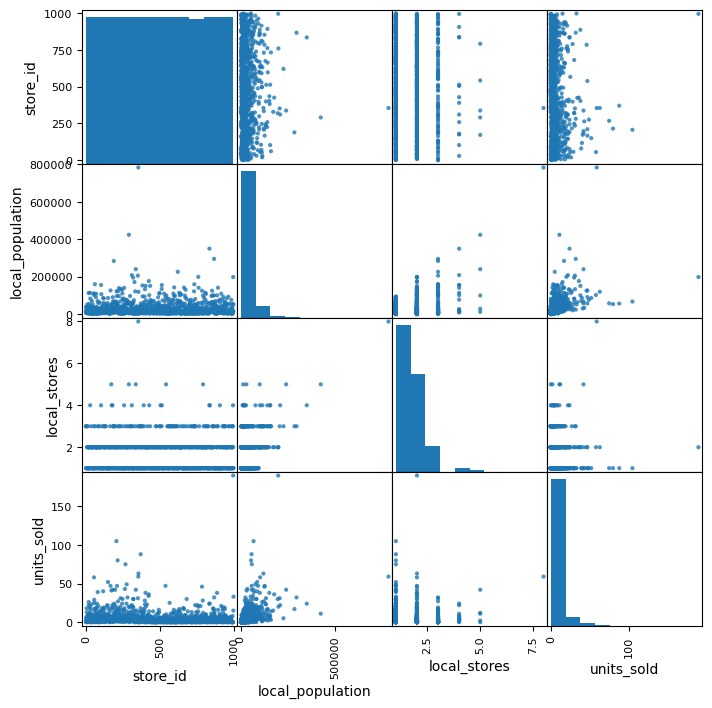

In [97]:
scatter_matrix(df, alpha=0.8, figsize=(8, 8), diagonal='hist')
plt.show()

C:\Users\hayth\AppData\Local\Temp\ipykernel_5940\3594435605.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



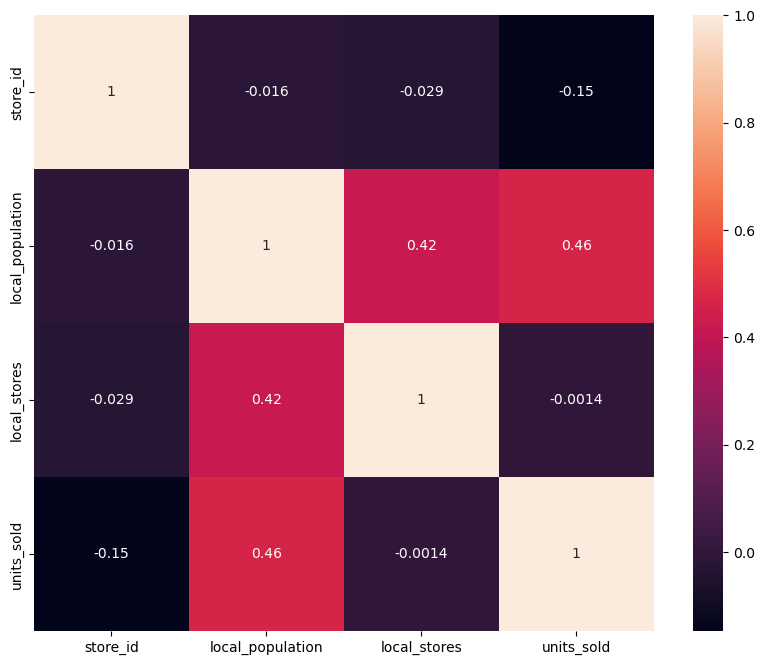

In [98]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [99]:
df = pd.get_dummies(df, columns= ['state'], drop_first = True)

In [100]:
df.head()

,store_id,date,local_population,local_stores,units_sold,state_Massachusetts,state_New Jersey,state_New York,state_New jersey,state_New york,state_Pennsylvania,state_Rhode Island,state_Vermont
0,131,2021-11-19,7438,2,1.0,0,0,1,0,0,0,0,0
1,203,2021-04-09,59715,1,14.0,0,0,1,0,0,0,0,0
2,50,2021-08-19,29231,2,9.0,0,0,1,0,0,0,0,0
3,585,2021-01-18,4884,2,0.0,0,0,0,0,0,1,0,0
4,138,2021-03-25,12350,1,2.0,0,0,1,0,0,0,0,0


In [101]:
df.columns

Index(['store_id', 'date', 'local_population', 'local_stores', 'units_sold',
       'state_Massachusetts', 'state_New Jersey', 'state_New York',
       'state_New jersey', 'state_New york', 'state_Pennsylvania',
       'state_Rhode Island', 'state_Vermont'],
      dtype='object')

C:\Users\hayth\AppData\Local\Temp\ipykernel_5940\3028576344.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

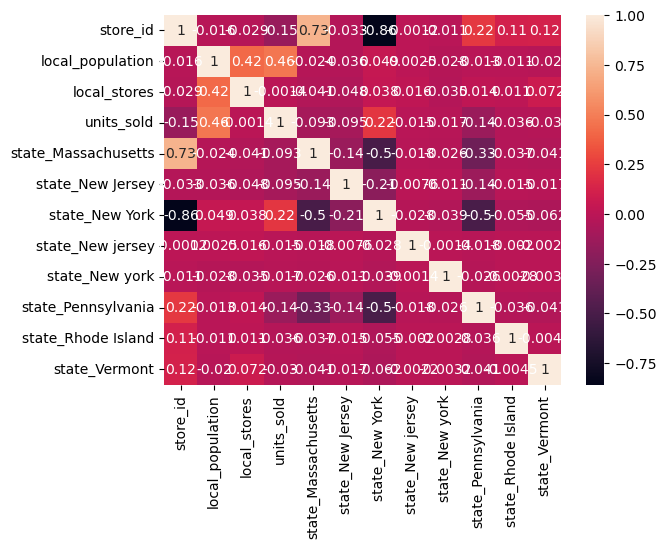

In [102]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot: xlabel='units_sold', ylabel='Density'>

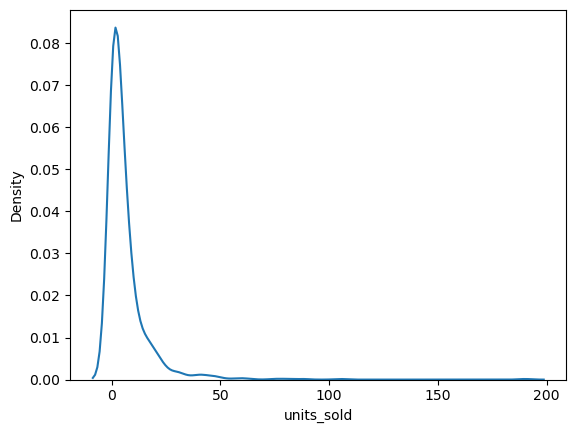

In [103]:
sns.kdeplot(df['units_sold'])

In [104]:
x = df[['local_population', 'local_stores',
       'state_Massachusetts', 'state_New Jersey',
       'state_New York', 'state_New jersey', 'state_New york',
       'state_Pennsylvania', 'state_Rhode Island', 'state_Vermont']]
y = df['units_sold']

In [105]:
x_train, x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [106]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

In [107]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R^2): 0.40224130677283176
Mean Absolute Error (MAE): 4.026175


In [108]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
}

In [110]:
grid_search = GridSearchCV(estimator= rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [111]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [112]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [113]:
best_model

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [114]:
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

In [115]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R^2): 0.467861648380797
Mean Absolute Error (MAE): 3.8735318493103272


In [116]:
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

In [117]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error (MAE): 4.566478374497965
R-squared (R^2): 0.2870902470444662


In [118]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [119]:
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [120]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [121]:
best_params

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [122]:
best_estimator

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [123]:
xgb_regressor = xgb.XGBRegressor(n_estimators=200, learning_rate = 0.01, max_depth = 3 )
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

In [124]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error (MAE): 4.358613082766533
R-squared (R^2): 0.36982086046982277


In [125]:
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(x_train, y_train)
y_pred = lasso_regressor.predict(x_test)

In [126]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error (MAE): 4.642175148442422
R-squared (R^2): 0.2401325470937703


In [127]:
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [128]:
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

LinearRegression()

In [129]:
y_pred = poly_reg.predict(x_test_poly)

In [130]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error (MAE): 3.940699715118917
R-squared (R^2): 0.3698339095823966


<h1>########### Handling outliers using winsorize ###########</h1>

In [131]:
def winsorize_column(data, column_name, lower_percentile=1, upper_percentile=99):
    '''
    Apply Winsorization to a specified column in a DataFrame.

    Winsorization involves capping extreme values by replacing them with the values at a specified lower and upper percentile.
    This technique helps mitigate the impact of outliers on statistical analyses and modeling, making the data more robust.
    '''
    lower_bound = np.percentile(data[column_name], lower_percentile)
    upper_bound = np.percentile(data[column_name], upper_percentile)

    data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
    data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])

    return data

In [135]:
for column in df.columns:
  df1 = winsorize_column(df, column)

In [136]:
df1.describe()

,store_id,local_population,local_stores,units_sold,state_Massachusetts,state_New Jersey,state_New York,state_New jersey,state_New york,state_Pennsylvania,state_Rhode Island,state_Vermont
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.000000,999.0,999.0
mean,499.234234,33562.147948,1.599600,6.054454,0.251251,0.055055,0.431431,0.0,0.0,0.247247,0.0,0.0
std,288.654228,35681.756289,0.738194,8.599987,0.433950,0.228202,0.495524,0.0,0.0,0.431628,0.0,0.0
min,9.980000,1948.940000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,249.500000,11093.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
50%,499.000000,21099.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
75%,748.500000,43020.000000,2.000000,7.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0
max,989.020000,198949.840000,4.000000,47.040000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0


In [139]:
x1 = df1[['local_population', 'local_stores',
       'state_Massachusetts', 'state_New Jersey',
       'state_New York', 'state_New jersey', 'state_New york',
       'state_Pennsylvania', 'state_Rhode Island', 'state_Vermont']]
y1 = df1['units_sold']

In [140]:
x1_train, x1_test , y1_train , y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [141]:
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)
rf_regressor.fit(x1_train, y1_train)
y_pred = rf_regressor.predict(x1_test)

In [142]:
r2 = r2_score(y1_test, y_pred)
mae = mean_absolute_error(y1_test, y_pred)
print(f'R-squared (R^2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R^2): 0.5606063640802161
Mean Absolute Error (MAE): 3.513519817952722


<h1>########### handling outliers using normalisation ###########<h1/>

In [145]:
df2 = df.drop(['date', 'store_id'], axis=1)

In [147]:
scaler = MinMaxScaler(feature_range=(0,1))
normalized_df = scaler.fit_transform(df2)

In [150]:
normalized_df = pd.DataFrame(data=normalized_df, columns=df2.columns)

In [151]:
normalized_df.columns

Index(['local_population', 'local_stores', 'units_sold', 'state_Massachusetts',
       'state_New Jersey', 'state_New York', 'state_New jersey',
       'state_New york', 'state_Pennsylvania', 'state_Rhode Island',
       'state_Vermont'],
      dtype='object')

In [152]:
x_norm = normalized_df[['local_population', 'local_stores', 'state_Massachusetts',
       'state_New Jersey', 'state_New York', 'state_New jersey',
       'state_New york', 'state_Pennsylvania', 'state_Rhode Island',
       'state_Vermont']]

y_norm = normalized_df['units_sold']

In [153]:
x_norm_train, x_norm_test , y_norm_train , y_norm_test = train_test_split(x_norm, y_norm, test_size = 0.2, random_state = 42)

In [155]:
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)
rf_regressor.fit(x_norm_train, y_norm_train)
y_pred = rf_regressor.predict(x_norm_test)

In [157]:
r2 = r2_score(y_norm_test, y_pred)
mae = mean_absolute_error(y_norm_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared (R^2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R^2): 0.5606127007251541
Mean Absolute Error (MAE): 0.07469026507850185
Mean Squared Error (MSE): 148.48522322042493
